In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

import sys
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../..'
dir_BinnedFit = dir_repo+"/BinnedFit"

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import load_pickle
from chainTool import ChainTool

def print_parfid(pars):
    par_key = ['g1','g2','sini','vcirc','theta_int','redshift',
           'slitWidth','slitAngles','ngrid', 'subGridPixScale', 'nm_per_pixel',
           'flux', 'expTime', 'area']

    for item in par_key:
        if isinstance(pars[item], (list, np.ndarray)):
            print('slitAngles : ')
            print(f'    major : f{pars[item][0]*180./np.pi : .2f}')
            print(f'    minor : f{pars[item][1]*180./np.pi : .2f}')
        else:
            print(item+' : ', f'{pars[item]:.2f}')

# load chains

In [2]:
dir_file = '/Users/hhg/Research/kinematic_lensing/data/chainBFforward/'
chainfile0 = dir_file +'chainBF_Ha_noise0_g10.05_g20.05_sini0.5_z0.40_thetaINT0.0_sW0.06_256_300k_D0521.pkl'
chainfile1 = dir_file +'chainBF_Ha_noise0_g10.05_g20.05_sini0.5_z0.40_thetaINT0.0_sW0.12_256_300k_D0521.pkl'
chainfile2 = dir_file +'chainBF_Ha_noise0_g10.05_g20.05_sini0.5_z0.40_thetaINT0.0_sW0.50_256_300k_D0521.pkl'
chainfile3 = dir_file +'chainBF_Ha_noise0_g10.05_g20.05_sini0.5_z0.40_thetaINT0.0_sW1.00_256_300k_D0521.pkl'

chainInfo0 = load_pickle(chainfile0)
chainInfo1 = load_pickle(chainfile1)
chainInfo2 = load_pickle(chainfile2)
chainInfo3 = load_pickle(chainfile3)

In [3]:
print_parfid(chainInfo0['par_fid'])

g1 :  0.05
g2 :  0.05
sini :  0.50
vcirc :  200.00
theta_int :  0.00
redshift :  0.40
slitWidth :  0.06
slitAngles : 
    major : f 21.01
    minor : f 111.01
ngrid :  256.00
subGridPixScale :  0.06
nm_per_pixel :  0.03
flux :  2094.54
expTime :  1800.00
area :  785000.00


In [4]:
Chain0 = ChainTool(chainInfo0, Nburn=100*1500, Nend=100*3000) ; Chain0.add_vsini()
Chain1 = ChainTool(chainInfo1, Nburn=100*1500, Nend=100*3000) ; Chain1.add_vsini()
Chain2 = ChainTool(chainInfo2, Nburn=100*1500, Nend=100*3000) ; Chain2.add_vsini()
Chain3 = ChainTool(chainInfo3, Nburn=100*1500, Nend=100*3000) ; Chain3.add_vsini()

In [5]:
from chainconsumer import ChainConsumer
blue        = "#214F94"
red         = "#CC0204"
yellow      = "#FFA903"
gray        = "#858278"
black       = "#000000"
green       = "#73ab24"
purple      = "#8600C8"
lightblue   = "#6898FF"
lightblue2  = "#82b9e6"
yellowgreen = "#8dcd32" #"#8DE900"
lightteal   = "#7FC2BF"
teal        = "#51ABAE"
lightgray   = "#CDCDCD"

def gen_legend(chainInfo):
    g1 = chainInfo['par_fid']['g1']
    g2 = chainInfo['par_fid']['g2']
    sini = chainInfo['par_fid']['sini']
    slitWidth = chainInfo['par_fid']['slitWidth']
    legend= f"slitWidth={slitWidth:.2f} sini={sini} g1={g1} g2={g2}"
    return legend

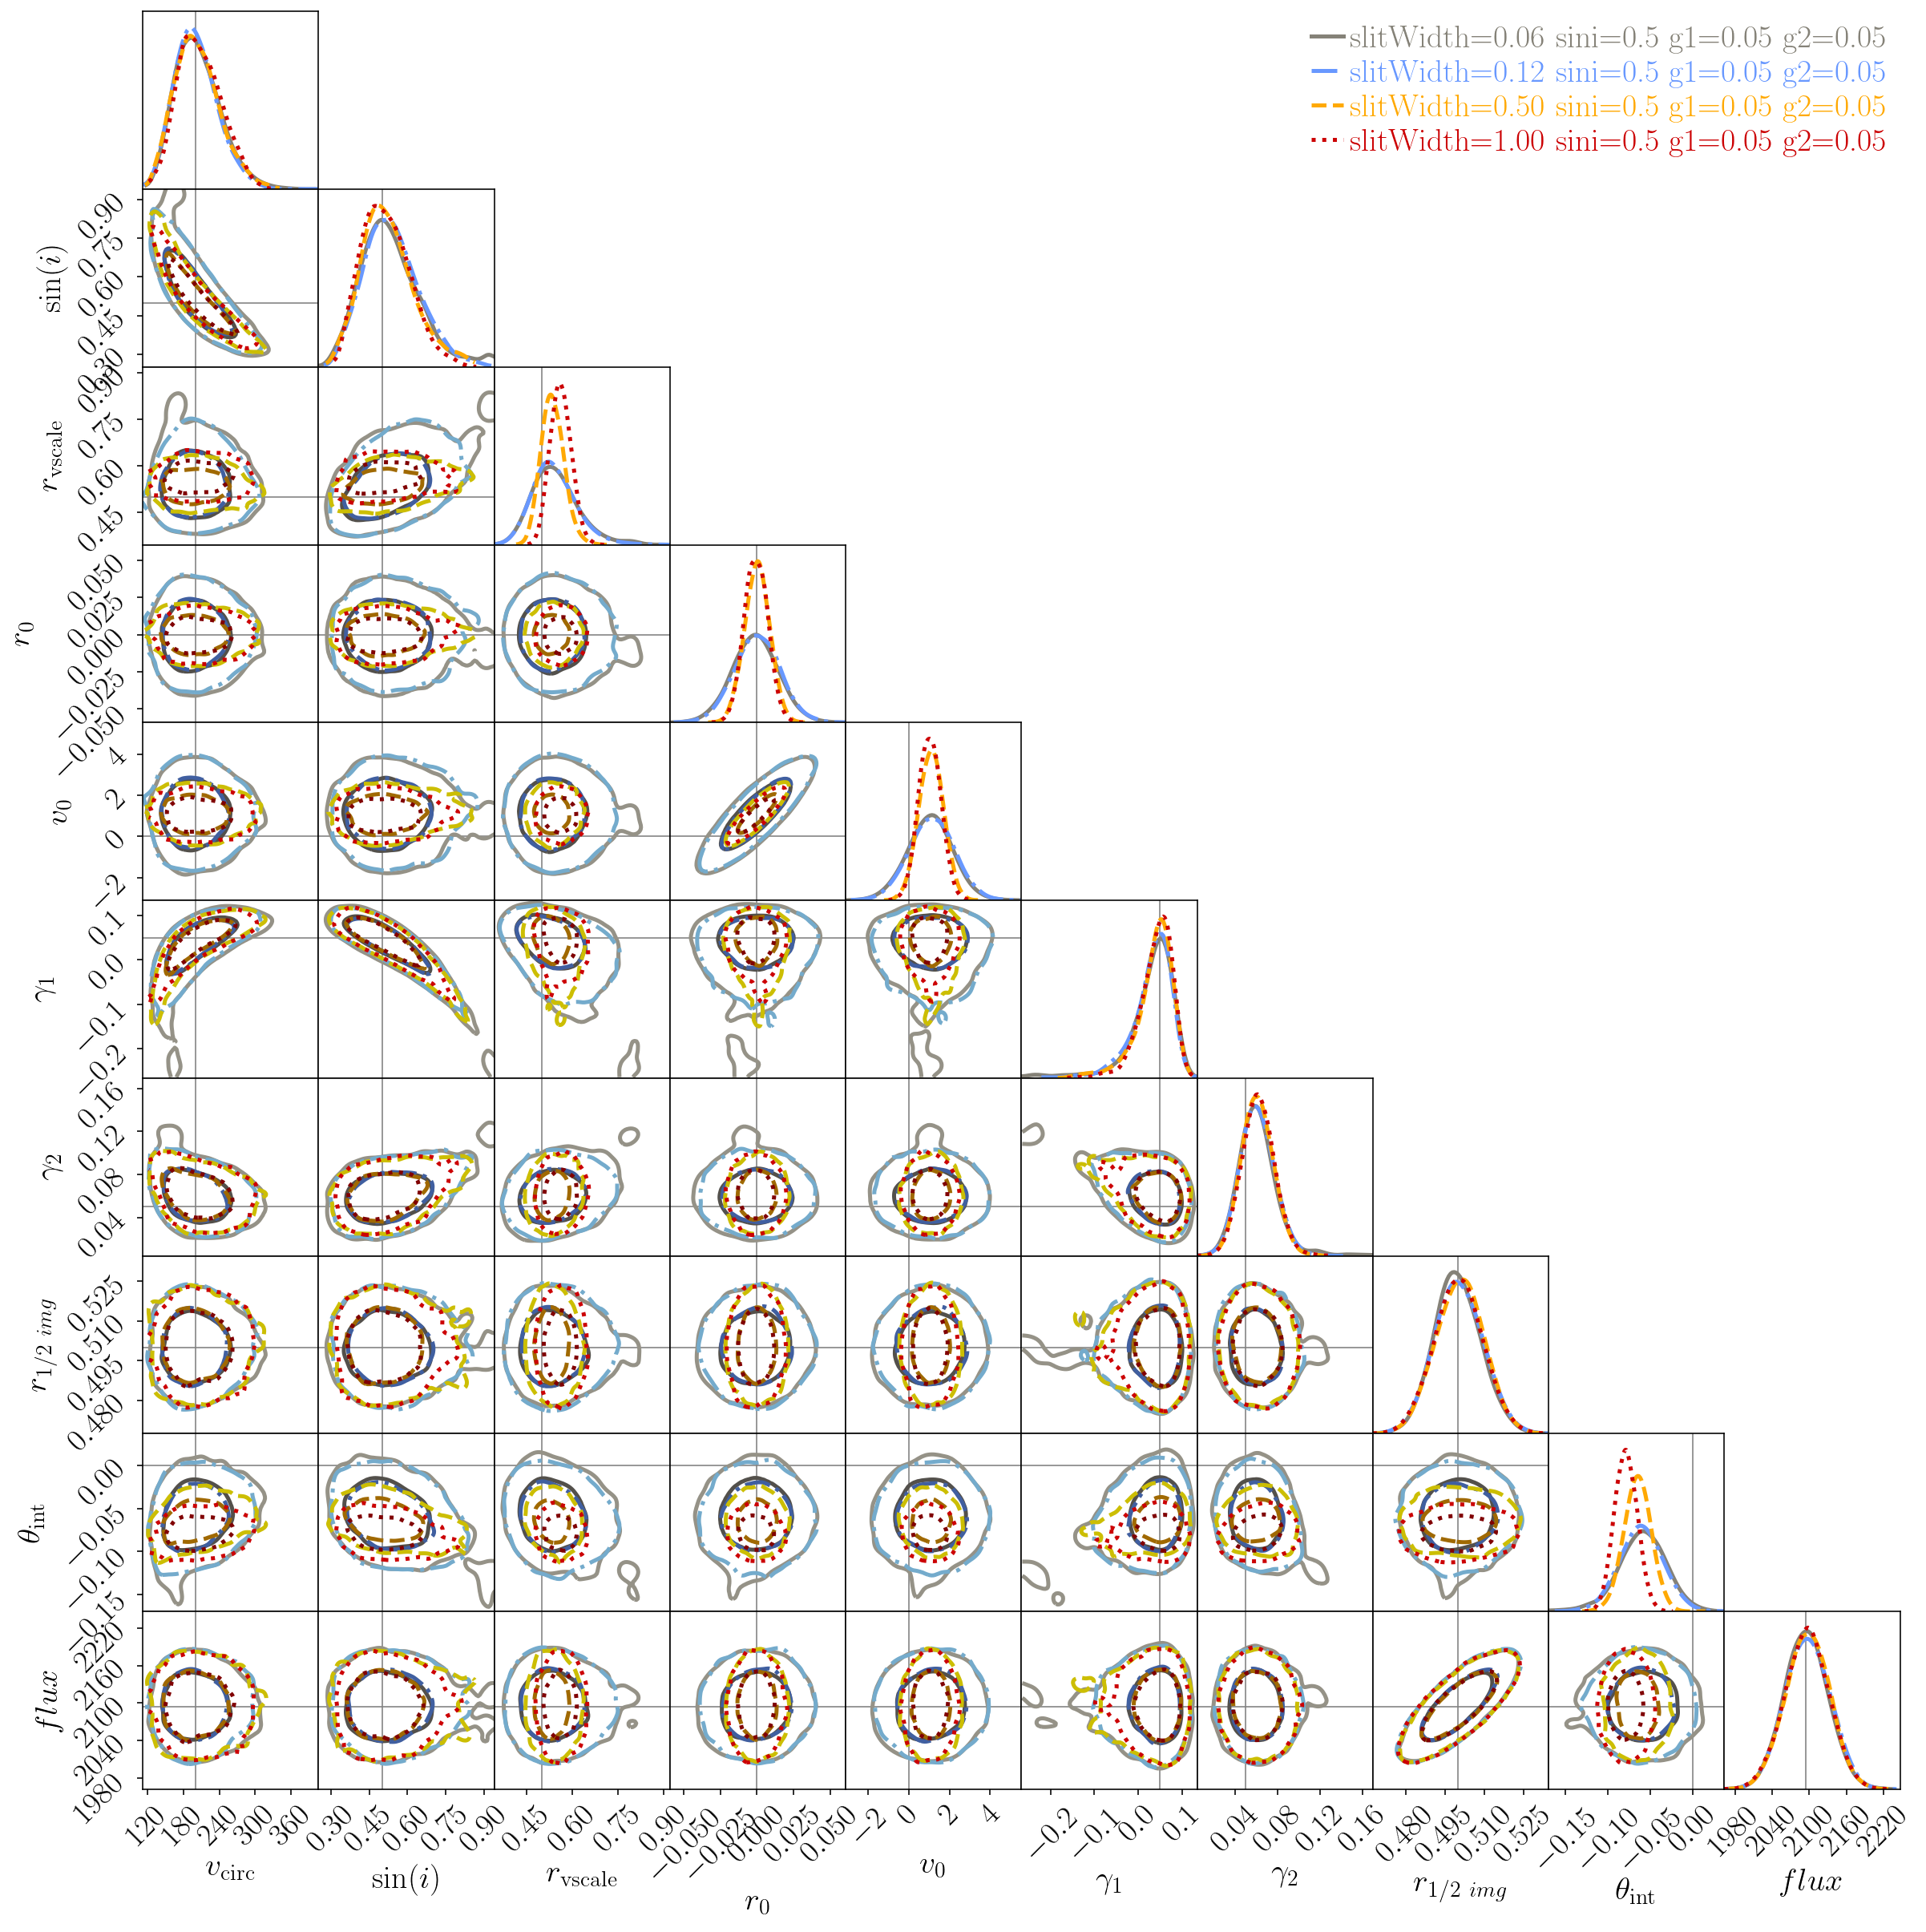

In [6]:
Nchains = 4
colors = [gray, lightblue, yellow, red, blue, yellowgreen, green, green, black]
lines = ["-", '-.', "--", ":", '-', ":", "--", ':']

statistics="max"

select_par_key = chainInfo0['par_key']

legend0 = gen_legend(chainInfo0) 
legend1 = gen_legend(chainInfo1)
legend2 = gen_legend(chainInfo2)
legend3 = gen_legend(chainInfo3)

parID1, parName1, par_x1 = Chain0.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain0.chain[:, parID1], parameters=parName1, name=legend0)
c.add_chain(Chain1.chain[:, parID1], parameters=parName1, name=legend1)
c.add_chain(Chain2.chain[:, parID1], parameters=parName1, name=legend2)
c.add_chain(Chain3.chain[:, parID1], parameters=parName1, name=legend3)

c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=20,tick_font_size=20,
            shade=[False]*Nchains, colors=colors, linestyles = lines,
            statistics=statistics,summary=True)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)

fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2.5 + fig.get_size_inches())
fig.savefig("_fig_chain.pdf", transparent=True)

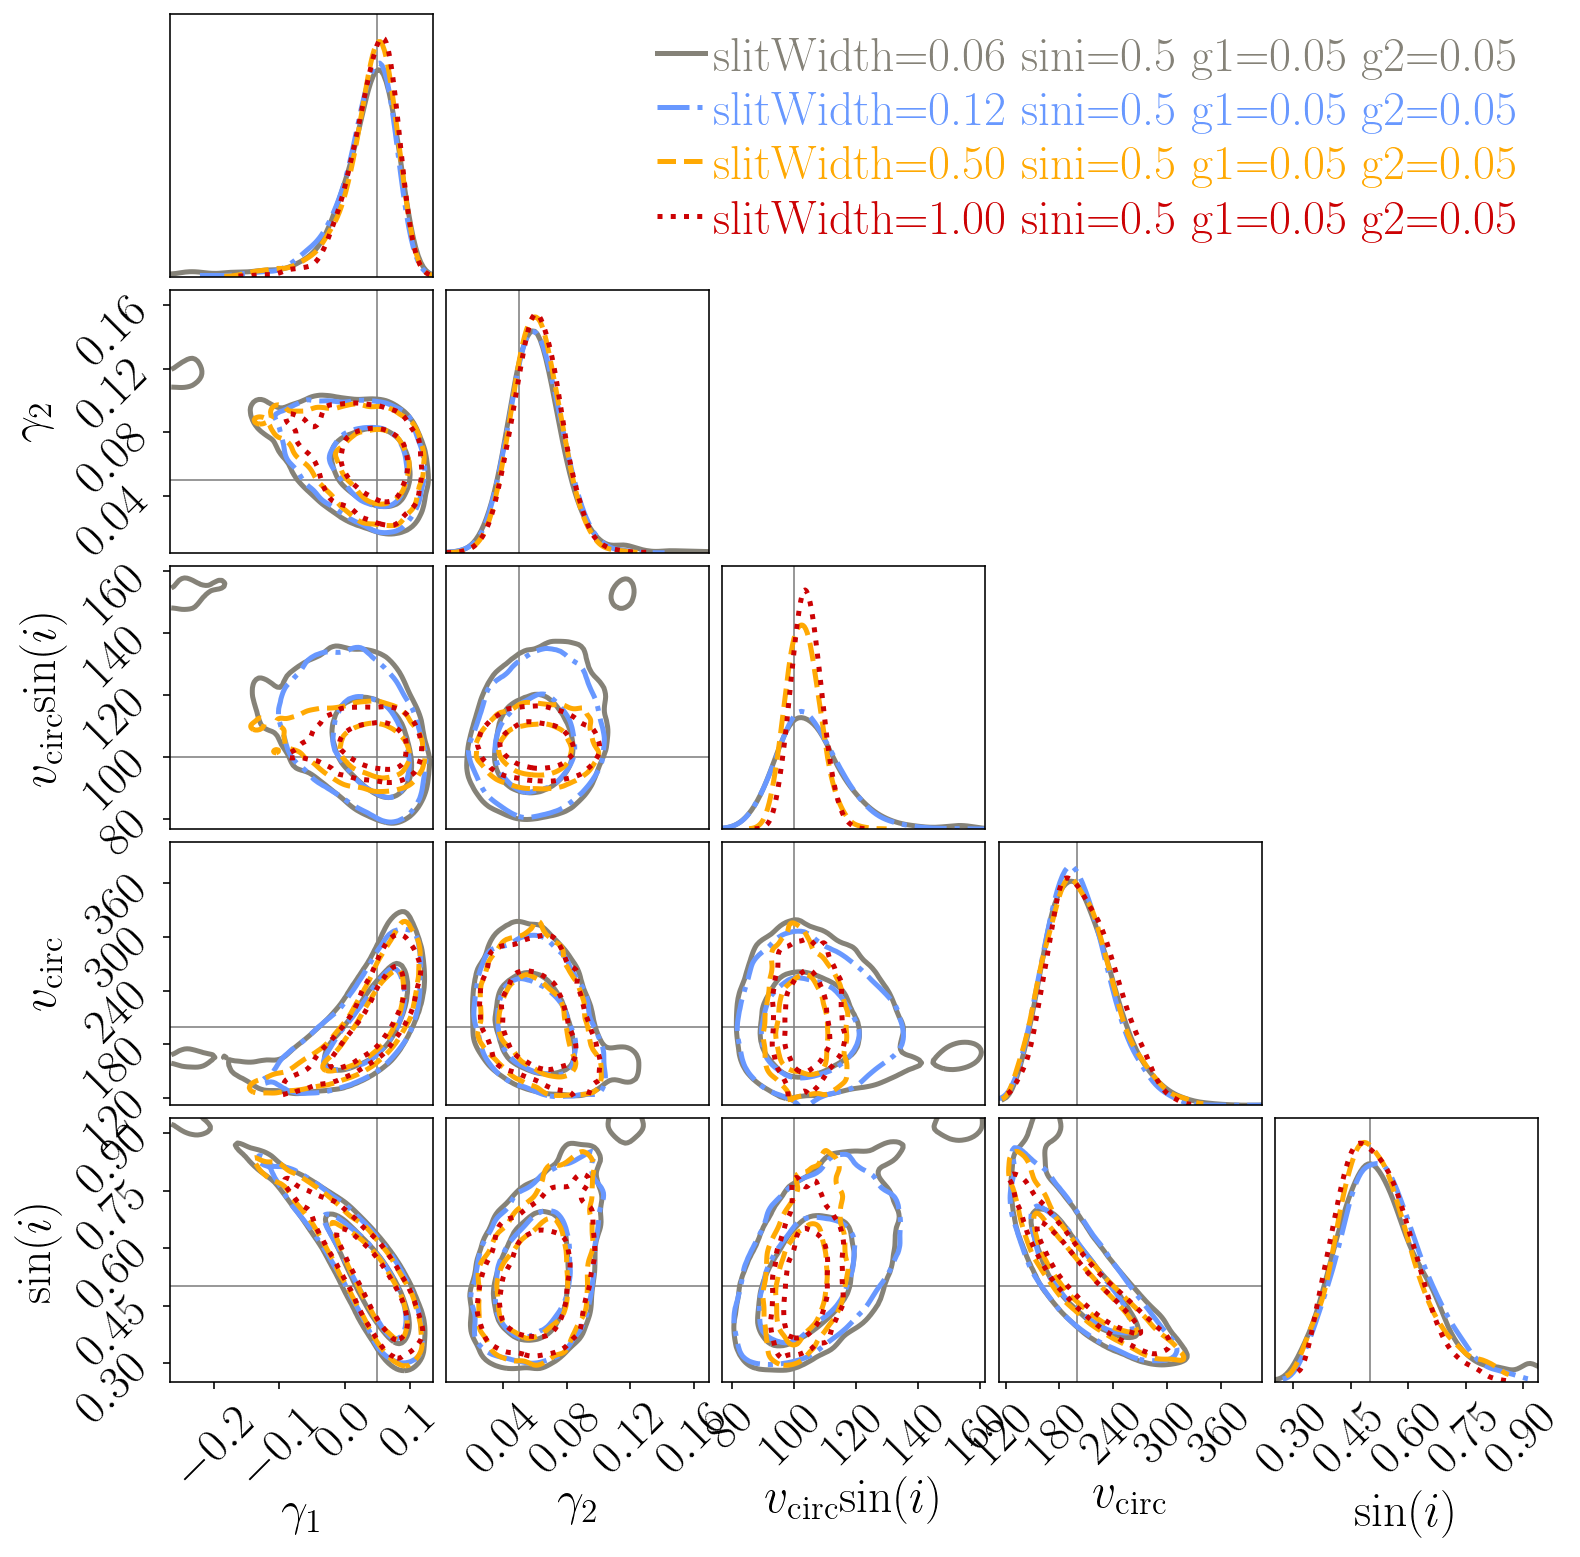

In [7]:
Nchains = 4
colors = [gray, lightblue, yellow, red, blue, yellowgreen, green, green, black]
lines = ["-", '-.', "--", ":", '-', ":", "--", ':']

statistics="max"

select_par_key = ['g1','g2', 'vsini', 'vcirc', 'sini'] #, 'v_0'

parID1,parName1,par_x1 = Chain0.select_par_info(select_par_key)


c = ChainConsumer()
c.add_chain(Chain0.chain[:, parID1]    , parameters=parName1 ,name=legend0)
c.add_chain(Chain1.chain[:, parID1]    , parameters=parName1 ,name=legend1)
c.add_chain(Chain2.chain[:, parID1]    , parameters=parName1 ,name=legend2)
c.add_chain(Chain3.chain[:, parID1]    , parameters=parName1 ,name=legend3)


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=24,tick_font_size=24,
            shade=[False]*Nchains,
            colors=colors,
            linestyles=lines,
            statistics=statistics,
            shade_gradient=[0]*Nchains,
            summary=True) #,color_params='posterior'

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
fig = c.plotter.plot(legend=True, truth=par_x1)

fig.subplots_adjust(left=0.14, right=0.9, bottom=0.14, top=0.9)

fig.set_size_inches(5.0 + fig.get_size_inches())
fig.savefig("_figchain.pdf", transparent=True)

In [8]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
def print_bfInfo(Chain):
    print('slitWidth:', Chain.par_fid['slitWidth'], '| g1_fid:', Chain.par_fid['g1'], '| g2_fid:', Chain.par_fid['g2'])
    bf_info = Chain.par_bestfit(select_par_key=['g1', 'g2', 'vcirc', 'sini', 'vsini'], statistics='max', mode=0)
    df = pd.DataFrame(bf_info, index=['lower', 'max', 'upper'])
    #print(pd.DataFrame(bf_info, index=['lower', 'max', 'upper']))
    return df

In [9]:
df = print_bfInfo(Chain0)
df

slitWidth: 0.06 | g1_fid: 0.05 | g2_fid: 0.05


,g1,g2,vcirc,sini,vsini
lower,0.01,0.04,160.66,0.40,93.09
max,0.05,0.06,194.98,0.50,101.08
upper,0.09,0.07,234.30,0.62,113.56


In [10]:
df = print_bfInfo(Chain1)
df

slitWidth: 0.12 | g1_fid: 0.05 | g2_fid: 0.05


,g1,g2,vcirc,sini,vsini
lower,0.01,0.04,160.33,0.42,93.90
max,0.06,0.06,193.31,0.53,101.52
upper,0.08,0.08,230.44,0.63,113.42


In [11]:
df = print_bfInfo(Chain2)
df

slitWidth: 0.5 | g1_fid: 0.05 | g2_fid: 0.05


,g1,g2,vcirc,sini,vsini
lower,0.02,0.05,159.10,0.41,96.97
max,0.05,0.06,191.28,0.48,102.91
upper,0.08,0.08,233.75,0.60,107.90


In [12]:
df = print_bfInfo(Chain3)
df

slitWidth: 1.0 | g1_fid: 0.05 | g2_fid: 0.05


,g1,g2,vcirc,sini,vsini
lower,0.02,0.05,165.50,0.41,98.99
max,0.06,0.06,186.89,0.47,103.20
upper,0.08,0.08,238.99,0.59,108.50
